<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [ ]:
%pip install plotly

In [ ]:
%pip install nbformat 

In [267]:
#Importation de la librairie Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat as nbf

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [268]:
#Importation du fichier population.csv
population = pd.read_csv('données/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('données/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('données/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('données/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [269]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [ ]:
population.describe(include ='all')

In [271]:
#Consulter le nombre de colonnes
nb_colonnes = len(population.columns)
print("Nombre de colonnes :", nb_colonnes)
print("\n" + "-"*50 + "\n")
#La nature des données dans chacune des colonnes
print(population.dtypes)
print("\n" + "-"*50 + "\n")
population.info()
print("\n" + "-"*50 + "\n")

Nombre de colonnes : 3

--------------------------------------------------

Zone       object
Année       int64
Valeur    float64
dtype: object

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB

--------------------------------------------------



In [272]:
#Affichage les 5 premières lignes de la table
print(population.head())

          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [273]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
population["Valeur"] = population["Valeur"] * 1000


In [274]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur": "Population"})

In [275]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head())

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


In [ ]:
population.describe()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [277]:
#Afficher les dimensions du dataset

dimensions = dispo_alimentaire.shape
print(dimensions)

(15605, 18)


In [278]:
#Consulter le nombre de colonnes
nb_colonnes = dispo_alimentaire.shape[1]
print("Nombre de colonnes :", nb_colonnes)

Nombre de colonnes : 18


In [279]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

In [280]:
# Vérifier le nombre de valeurs nulles dans chaque colonne
valeurs_nulles = dispo_alimentaire.isnull().sum()

# Afficher le nombre de valeurs nulles
print("Nombre de valeurs nulles par colonne :")
print(valeurs_nulles)

#calculer le pourcentage de valeurs null
pourcentage_valeurs_nulles = dispo_alimentaire.isnull().mean() * 100

# Afficher le pourcentage de valeurs nulles
print("Pourcentage de valeurs nulles par colonne :")
print(pourcentage_valeurs_nulles)

Nombre de valeurs nulles par colonne :
Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                

In [281]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [282]:
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# Liste des colonnes à convertir de milliers de tonnes en kilogrammes
colonnes_a_convertir = ['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',  
    'Semences', 'Traitement', 'Variation de stock'
]

# Multiplier les valeurs de ces colonnes par 1,000,000 pour convertir en kilogrammes
for colonne in colonnes_a_convertir:
    if colonne in dispo_alimentaire.columns:
        dispo_alimentaire[colonne] = dispo_alimentaire[colonne] * 1000000


In [284]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [285]:
#Afficher les dimensions du dataset
dimensions = aide_alimentaire.shape
print(dimensions)

(1475, 4)


In [286]:
#Consulter le nombre de colonnes
nb_colonnes = aide_alimentaire.shape[1]
print("Nombre de colonnes :", nb_colonnes)

Nombre de colonnes : 4


In [287]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())


  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [288]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"})

In [289]:
#Multiplication de la colonne Valeur qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000


In [290]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [291]:
#Afficher les dimensions du dataset
dimensions = sous_nutrition.shape
print(dimensions)

(1218, 3)


In [292]:
#Consulter le nombre de colonnes
nb_colonnes = sous_nutrition.shape[1]
print("Nombre de colonnes :", nb_colonnes)

Nombre de colonnes : 3


In [293]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [294]:
print(sous_nutrition.dtypes)

Zone      object
Année     object
Valeur    object
dtype: object


In [ ]:
sous_nutrition.describe()

In [296]:
#verifier les valeurs
# Vérifier le nombre de valeurs '<0.1' dans chaque colonne
nombre_valeurs_01 = (sous_nutrition['Valeur'] == '<0.1').sum()
print("\nNombre de valeurs <0.1 par colonne :")
print(nombre_valeurs_01)

# Afficher le nombre de valeurs égales à "<0.1"
print("Nombre de valeurs égales à '<0.1' dans la colonne 'Valeur' :")
print(nombre_valeurs_01)



Nombre de valeurs <0.1 par colonne :
120
Nombre de valeurs égales à '<0.1' dans la colonne 'Valeur' :
120


In [297]:
# Remplacer les valeurs inférieures à 0.1 par zéro dans la colonne 'Valeur'
sous_nutrition.loc[sous_nutrition['Valeur'] =='<0.1', 'Valeur'] = 0

# Afficher les premières lignes du dataset pour vérifier les modifications
print("Aperçu des données après modification :")
print(sous_nutrition.head())

Aperçu des données après modification :
          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [298]:
sous_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,0
freq,6,203,120


In [299]:
# Convertir la colonne 'Valeur' en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [300]:
print(sous_nutrition.dtypes)

Zone       object
Année      object
Valeur    float64
dtype: object


In [301]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})

In [302]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [303]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [304]:
# Filtrer les données pour l'année 2017 dans la table population
population_2017 = population[population['Année'] == 2017]

# Filtrer les données pour la plage d'années 2017-2019 dans la table sous_nutrition
#2016-2018
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']

# Effectuer la jointure sur la colonne 'Zone'
jointure_sous_nutrition = pd.merge(population_2017, sous_nutrition_2017, on='Zone')

# Calculer la proportion de personnes en état de sous-nutrition
jointure_sous_nutrition['proportion_sous_nutrition'] = (jointure_sous_nutrition['sous_nutrition'] / jointure_sous_nutrition['Population']) * 100

# Afficher le résultat
jointure_sous_nutrition



,Zone,Année_x,Population,Année_y,sous_nutrition,proportion_sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,5.437666
2,Albanie,2017,2884169.0,2016-2018,100000.0,3.467203
3,Algérie,2017,41389189.0,2016-2018,1300000.0,3.140917
4,Allemagne,2017,82658409.0,2016-2018,NaN,NaN
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0,27.208586
199,Viet Nam,2017,94600648.0,2016-2018,6500000.0,6.870989
200,Yémen,2017,27834819.0,2016-2018,NaN,NaN
201,Zambie,2017,16853599.0,2016-2018,NaN,NaN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [305]:
#L'apport calorique moyen mondial (toutes populations confondues) est d’environ 2 900 kcal/jour par personne (données FAO 2023),
# mais ce chiffre inclut aussi les pertes et gaspillages alimentaires.
#Donc la consommation réelle par un individu est estimée autour de : 2 200 à 2 600 kcal/jour pour un adulte moyen.
#2250 Kcal/jour est utilisé comme consommation_moyenne dans nos calculs


In [306]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
# Effectuer la jointure sur la colonne 'Zone'
jointure_dispo_alim = pd.merge(population_2017, dispo_alimentaire, on='Zone' )

In [307]:
#Affichage du nouveau dataframe
jointure_dispo_alim

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [308]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
jointure_dispo_alim['dispo_kcal'] = jointure_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] * jointure_dispo_alim['Population']


# Afficher le résultat
jointure_dispo_alim



,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0,341678280.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0,242022115.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,...,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0,99656165.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,14236595.0


In [309]:
#Calcul du nombre d'humains pouvant être nourris
# Calculer la disponibilité alimentaire totale en kilocalories (données basées sur Kcal/personnes/jour)
total_dispo_kcal = jointure_dispo_alim['dispo_kcal'].sum()

# Consommation moyenne par personne en kilocalories par an
consommation_moyenne = 2250

# Calculer le nombre d'humains pouvant être nourris
nombre_humains_nourris = total_dispo_kcal / consommation_moyenne
print(f"Nombre d'humains pouvant être nourris : {nombre_humains_nourris:,.0f}")

Nombre d'humains pouvant être nourris : 9,297,326,501


In [310]:
#recapitulation des chiffres (slide 5):
print(f"population mondiale 2017 : {population_2017['Population'].sum():,.0f}")
print(f"disponibilité alimentaire totale  : {total_dispo_kcal:,.0f}")
print(f"apport moyen : {consommation_moyenne:,.0f}", "KCal/jour")
print(f"Nombre d'humains pouvant être nourris : {nombre_humains_nourris:,.0f}")
#proportion de personnes en état de sous-nutrition 


population mondiale 2017 : 7,548,134,111
disponibilité alimentaire totale  : 20,918,984,627,331
apport moyen : 2,250 KCal/jour
Nombre d'humains pouvant être nourris : 9,297,326,501


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [311]:
#Transfert des données avec les végétaux dans un nouveau dataframe
# Filtrer les données pour ne conserver que les produits d'origine végétale
vegetaux_df = jointure_dispo_alim[jointure_dispo_alim['Origine'] == 'vegetale']

# Afficher le résultat
vegetaux_df

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Zimbabwe,2017,14236595.0,Sésame,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15407,Zimbabwe,2017,14236595.0,Thé,vegetale,0.0,0.0,1.0,0.54,0.00,...,8000000.0,12000000.0,1000000.0,8000000.0,0.0,19000000.0,0.0,0.0,0.0,14236595.0
15408,Zimbabwe,2017,14236595.0,Tomates,vegetale,0.0,0.0,1.0,1.80,0.01,...,27000000.0,0.0,3000000.0,25000000.0,1000000.0,24000000.0,0.0,0.0,0.0,14236595.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,14236595.0


In [312]:
#Calcul du nombre de kcal disponible pour les végétaux
# Calculer la disponibilité alimentaire totale en kilocalories pour les végétaux
total_dispo_kcal_vegetaux = vegetaux_df['dispo_kcal'].sum()

# Afficher le résultat
print(f"la disponibilité alimentaire totale en kilocalories pour les végétaux : {total_dispo_kcal_vegetaux:,.0f}")

la disponibilité alimentaire totale en kilocalories pour les végétaux : 17,260,764,211,501


In [313]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humains_nourris_vegetaux = total_dispo_kcal_vegetaux / consommation_moyenne

# Afficher le résultat
print(f"Nombre d'humains pouvant être nourris avec les végétaux : {nombre_humains_nourris_vegetaux:,.0f}")

Nombre d'humains pouvant être nourris avec les végétaux : 7,671,450,761


In [314]:
#recapitulation des chiffres (slide 6)
print(f"population mondiale 2017 : {population_2017['Population'].sum():,.0f}")
print(f"la disponibilité alimentaire totale en kilocalories pour les végétaux : {total_dispo_kcal_vegetaux:,.0f}")
print(f"apport moyen : {consommation_moyenne:,.0f}", "KCal/jour")
print(f"Nombre d'humains pouvant être nourris avec les végétaux : {nombre_humains_nourris_vegetaux:,.0f}")

population mondiale 2017 : 7,548,134,111
la disponibilité alimentaire totale en kilocalories pour les végétaux : 17,260,764,211,501
apport moyen : 2,250 KCal/jour
Nombre d'humains pouvant être nourris avec les végétaux : 7,671,450,761


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [315]:
#Calcul de la disponibilité totale
total_dispo_interieure = jointure_dispo_alim['Disponibilité intérieure'].sum()

print(f"Disponibilité totale dispo_interieur : {total_dispo_interieure:,.0f}")

Disponibilité totale dispo_interieur : 9,733,927,000,000


In [316]:
#total des différentes composantes de la dispo intérieure
tx_nourriture = (jointure_dispo_alim['Nourriture'].sum()/total_dispo_interieure) * 100
tx_animaux = (jointure_dispo_alim['Aliments pour animaux'].sum()/total_dispo_interieure) * 100
tx_pertes = (jointure_dispo_alim['Pertes'].sum()/total_dispo_interieure) * 100
tx_semences =(jointure_dispo_alim['Semences'].sum()/total_dispo_interieure) * 100
tx_autres = (jointure_dispo_alim['Autres Utilisations'].sum()/total_dispo_interieure) * 100
tx_traitement =(jointure_dispo_alim['Traitement'].sum()/total_dispo_interieure) * 100

print(f"Disponibilité Nourriture : {tx_nourriture:,.2f}%")
print(f"Disponibilité Aliments pour animaux : {tx_animaux:,.2f}%")
print(f"Disponibilité Pertes : {tx_pertes:,.2f}%")
print(f"Disponibilité Semences : {tx_semences:,.2f}%")
print(f"Disponibilité Autres Utilisations : {tx_autres:,.2f}%")
print(f"Disponibilité traitement : {tx_traitement:,.2f}%")


Disponibilité Nourriture : 49.37%
Disponibilité Aliments pour animaux : 13.23%
Disponibilité Pertes : 4.65%
Disponibilité Semences : 1.58%
Disponibilité Autres Utilisations : 8.82%
Disponibilité traitement : 22.45%


In [317]:

# Liste des colonnes à extraire
colonnes_interet = ['Aliments pour animaux', 'Nourriture', 'Pertes', 'Semences', 'Traitement']

# Dictionnaire pour stocker les pourcentages
pourcentages_dict = {}

# Boucle pour calculer les pourcentages et remplir le dictionnaire
for colonne in colonnes_interet:
    if colonne in jointure_dispo_alim.columns:
        total_colonne = jointure_dispo_alim[colonne].sum()
        pourcentage = (total_colonne / total_dispo_interieure) * 100
        pourcentages_dict[colonne] = pourcentage
    else:
        pourcentages_dict[colonne] = 0  # Ajouter 0 si la colonne n'existe pas


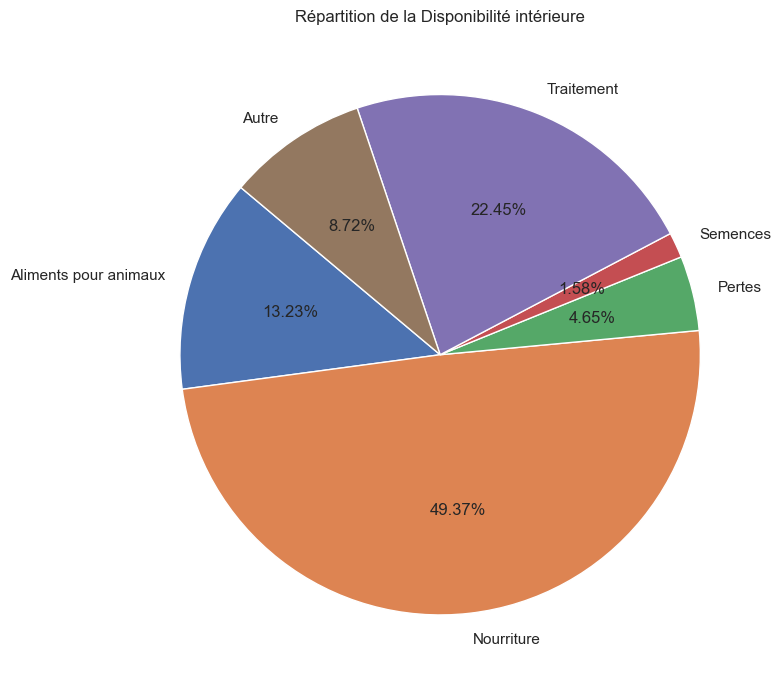

In [318]:
# Calculer le pourcentage non déclaré
total_pourcentage_declare = sum(pourcentages_dict.values())
pourcentage_non_declare = 100 - total_pourcentage_declare

# Ajouter le pourcentage non déclaré au dictionnaire
pourcentages_dict['Autre'] = pourcentage_non_declare

# Créer un nouveau DataFrame à partir du dictionnaire
gfx_dispo = pd.DataFrame([pourcentages_dict])

# Créer le graphique en camembert
fig, ax = plt.subplots(figsize=(8, 8))

# Extraire les pourcentages et les colonnes pour le graphique
pourcentages = gfx_dispo.iloc[0].tolist()
colonnes = gfx_dispo.columns

#personnalisation
sns.set_theme(style="ticks")
palette = sns.color_palette("deep", len(pourcentages))

# Tracer le graphique en camembert
ax.pie(pourcentages, labels=colonnes, autopct='%1.2f%%', startangle=140, colors=palette)

# Ajouter un titre
ax.set_title('Répartition de la Disponibilité intérieure')


# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [319]:
# Création d'une liste avec toutes les variables (colonnes) du DataFrame
liste_colonnes = list(jointure_dispo_alim.columns)

# Afficher la liste des colonnes
print("Liste des colonnes :")
for colonne in liste_colonnes:
    print(colonne)


Liste des colonnes :
Zone
Année
Population
Produit
Origine
Aliments pour animaux
Autres Utilisations
Disponibilité alimentaire (Kcal/personne/jour)
Disponibilité alimentaire en quantité (kg/personne/an)
Disponibilité de matière grasse en quantité (g/personne/jour)
Disponibilité de protéines en quantité (g/personne/jour)
Disponibilité intérieure
Exportations - Quantité
Importations - Quantité
Nourriture
Pertes
Production
Semences
Traitement
Variation de stock
dispo_kcal


In [320]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
# Valeur spécifique de la colonne 'Produit' à filtrer
produit_a_filtrer = ["Céréales, Autres", "Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho"]

# Filtrer les données pour ne conserver que les lignes où la colonne 'Produit' est égale à la valeur spécifiée
produits_df = jointure_dispo_alim[jointure_dispo_alim['Produit'].isin(produit_a_filtrer)]

# Afficher le résultat
produits_df

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,4.968938e+10
12,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,...,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,7.622184e+08
34,Afghanistan,2017,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,...,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1.088883e+08
40,Afghanistan,2017,36296113.0,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,...,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,9.436989e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,Zimbabwe,2017,14236595.0,Millet,vegetale,0.0,0.0,23.0,2.93,0.20,...,5.500000e+07,0.0,0.000000e+00,4.100000e+07,3000000.0,5.500000e+07,3000000.0,7000000.0,0.0,3.274417e+08
15382,Zimbabwe,2017,14236595.0,Orge,vegetale,3000000.0,0.0,2.0,0.24,0.01,...,6.600000e+07,10000000.0,1.600000e+07,3.000000e+06,4000000.0,6.000000e+07,1000000.0,55000000.0,0.0,2.847319e+07
15399,Zimbabwe,2017,14236595.0,Riz (Eq Blanchi),vegetale,0.0,0.0,101.0,10.09,0.19,...,1.580000e+08,1000000.0,1.560000e+08,1.430000e+08,0.0,0.000000e+00,0.0,15000000.0,2000000.0,1.437896e+09
15400,Zimbabwe,2017,14236595.0,Seigle,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


859615000000.0


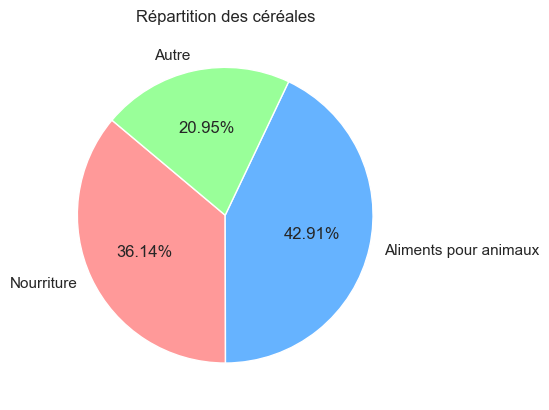

In [353]:
print(produits_df['Aliments pour animaux'].sum())

produits_df.loc[:, 'autre'] = (
    produits_df['Disponibilité intérieure'] - (produits_df['Nourriture'] + produits_df['Aliments pour animaux'])
)


global_animaux = produits_df['Aliments pour animaux'].sum() / produits_df['Disponibilité intérieure'].sum() * 100
global_humain = produits_df['Nourriture'].sum() / produits_df['Disponibilité intérieure'].sum() * 100
global_autre = produits_df['autre'].sum() / produits_df['Disponibilité intérieure'].sum() * 100

# Créer les données pour le graphique en camembert
labels = ['Nourriture', 'Aliments pour animaux', 'Autre']
sizes = [global_animaux, global_humain, global_autre]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Créer le graphique en camembert
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)

# Afficher le graphique
plt.title('Répartition des céréales')
plt.show()



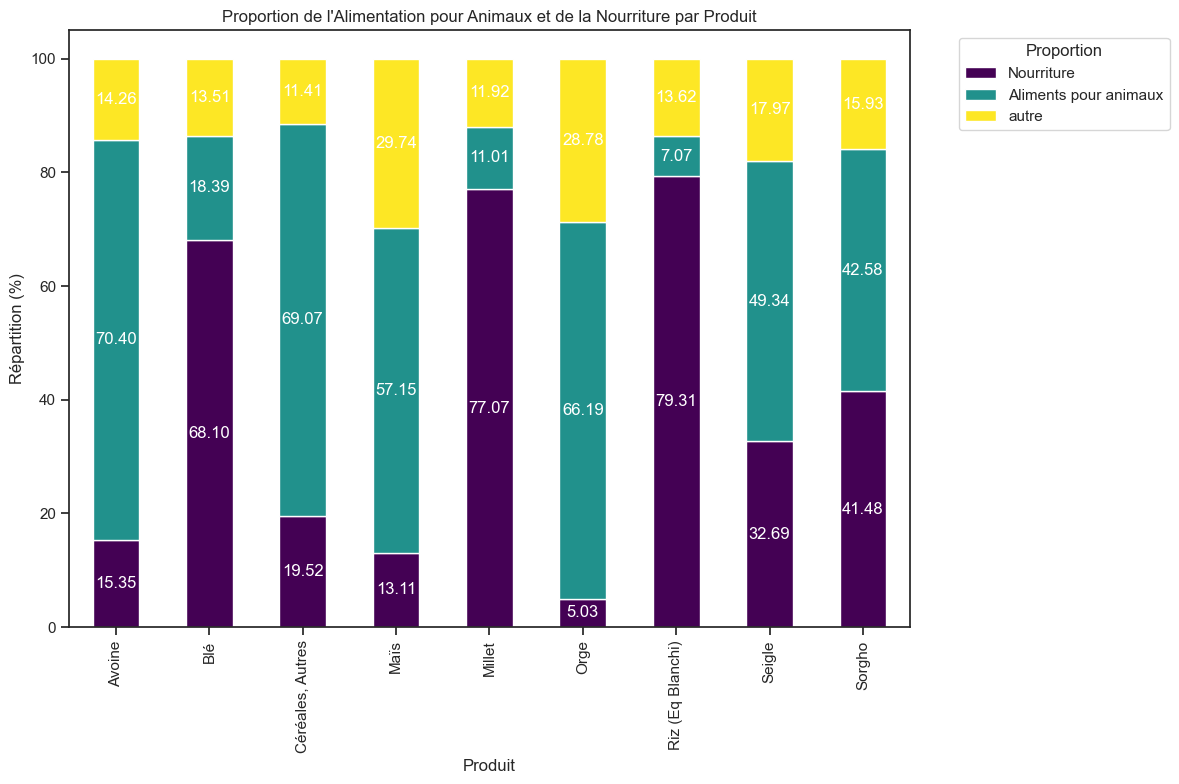

,Nourriture,Aliments pour animaux,autre
Produit,,,
Avoine,15.35,70.40,14.26
Blé,68.10,18.39,13.51
"Céréales, Autres",19.52,69.07,11.41
Maïs,13.11,57.15,29.74
Millet,77.07,11.01,11.92
Orge,5.03,66.19,28.78
Riz (Eq Blanchi),79.31,7.07,13.62
Seigle,32.69,49.34,17.97
Sorgho,41.48,42.58,15.93


In [322]:
# Agréger les données par produit pour obtenir la somme des proportions
agg_df = produits_df.groupby('Produit').sum()[['Nourriture', 'Aliments pour animaux', 'autre']]

# Calculer la somme totale de la disponibilité intérieure par produit
total_dispo_int = produits_df.groupby('Produit').sum()['Disponibilité intérieure']

# Calculer les pourcentages par rapport à la somme totale de la disponibilité intérieure
agg_df = agg_df.div(total_dispo_int, axis=0)*100

# Créer le graphique empilé
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
agg_df.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Ajouter des étiquettes et un titre
ax.set_ylabel('Répartition (%)')
ax.set_xlabel('Produit')
ax.set_title('Proportion de l\'Alimentation pour Animaux et de la Nourriture par Produit')
ax.legend(title='Proportion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher les valeurs sur les barres avec deux décimales
# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
   

    
# Afficher le graphique
plt.tight_layout()
plt.show()

agg_df.round(2)



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [323]:
#Création de la colonne proportion par pays
#la proportion a déjà été calculée par pays
print(jointure_sous_nutrition)


                                       Zone  Année_x  Population    Année_y  \
0                               Afghanistan     2017  36296113.0  2016-2018   
1                            Afrique du Sud     2017  57009756.0  2016-2018   
2                                   Albanie     2017   2884169.0  2016-2018   
3                                   Algérie     2017  41389189.0  2016-2018   
4                                 Allemagne     2017  82658409.0  2016-2018   
..                                      ...      ...         ...        ...   
198  Venezuela (République bolivarienne du)     2017  29402484.0  2016-2018   
199                                Viet Nam     2017  94600648.0  2016-2018   
200                                   Yémen     2017  27834819.0  2016-2018   
201                                  Zambie     2017  16853599.0  2016-2018   
202                                Zimbabwe     2017  14236595.0  2016-2018   

     sous_nutrition  proportion_sous_nutrition  
0 

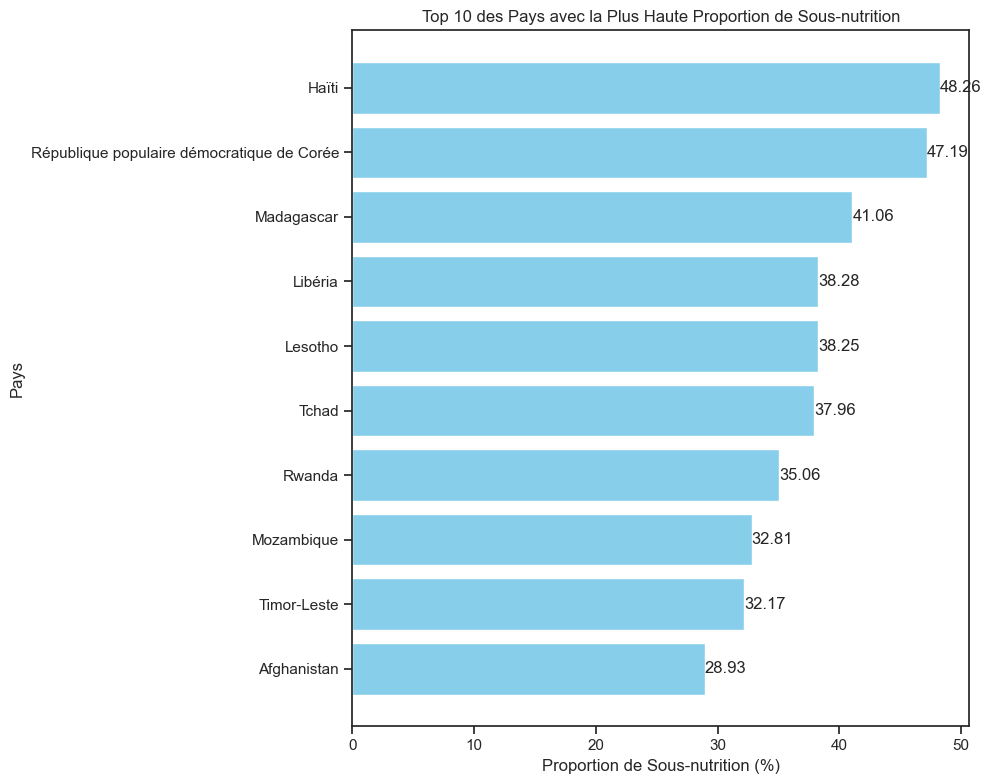

In [324]:
# Trier le DataFrame par la colonne 'proportion_sous_nutrition' dans l'ordre décroissant
top_10_sous_nutrition = jointure_sous_nutrition.sort_values(by='proportion_sous_nutrition', ascending=False).head(10)

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Histogramme horizontal
ax.barh(top_10_sous_nutrition['Zone'], top_10_sous_nutrition['proportion_sous_nutrition'], color='skyblue')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Proportion de Sous-nutrition (%)')
ax.set_ylabel('Pays')
ax.set_title('Top 10 des Pays avec la Plus Haute Proportion de Sous-nutrition')
ax.invert_yaxis()  # Inverser l'axe y pour que le pays avec la plus grande valeur soit en haut

# Afficher les valeurs sur les barres
ax.bar_label(ax.containers[0], fmt='%.2f')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [325]:
country_translation = {
    "Afrique du Sud": "South Africa",
    "Albanie": "Albania",
    "Algérie": "Algeria",
    "Allemagne": "Germany",
    "Angola": "Angola",
    "Antigua-et-Barbuda": "Antigua and Barbuda",
    "Arabie saoudite": "Saudi Arabia",
    "Argentine": "Argentina",
    "Arménie": "Armenia",
    "Australie": "Australia",
    "Autriche": "Austria",
    "Azerbaïdjan": "Azerbaijan",
    "Bahamas": "Bahamas",
    "Bangladesh": "Bangladesh",
    "Barbade": "Barbados",
    "Belgique": "Belgium",
    "Belize": "Belize",
    "Bermudes": "Bermuda",
    "Bolivie (État plurinational de)": "Bolivia (Plurinational State of)",
    "Bosnie-Herzégovine": "Bosnia and Herzegovina",
    "Botswana": "Botswana",
    "Brunéi Darussalam": "Brunei Darussalam",
    "Brésil": "Brazil",
    "Bulgarie": "Bulgaria",
    "Burkina Faso": "Burkina Faso",
    "Bélarus": "Belarus",
    "Bénin": "Benin",
    "Cabo Verde": "Cabo Verde",
    "Cambodge": "Cambodia",
    "Cameroun": "Cameroon",
    "Canada": "Canada",
    "Chili": "Chile",
    "Chine - RAS de Hong-Kong": "China - Hong Kong SAR",
    "Chine - RAS de Macao": "China - Macao SAR",
    "Chypre": "Cyprus",
    "Colombie": "Colombia",
    "Congo": "Congo",
    "Costa Rica": "Costa Rica",
    "Croatie": "Croatia",
    "Cuba": "Cuba",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "Danemark": "Denmark",
    "Djibouti": "Djibouti",
    "Dominique": "Dominica",
    "El Salvador": "El Salvador",
    "Espagne": "Spain",
    "Estonie": "Estonia",
    "Eswatini": "Eswatini",
    "Fidji": "Fiji",
    "Finlande": "Finland",
    "France": "France",
    "Fédération de Russie": "Russian Federation",
    "Gabon": "Gabon",
    "Gambie": "Gambia",
    "Ghana": "Ghana",
    "Grenade": "Grenada",
    "Grèce": "Greece",
    "Guatemala": "Guatemala",
    "Guinée": "Guinea",
    "Guinée-Bissau": "Guinea-Bissau",
    "Guyana": "Guyana",
    "Géorgie": "Georgia",
    "Haïti": "Haiti",
    "Honduras": "Honduras",
    "Hongrie": "Hungary",
    "Inde": "India",
    "Indonésie": "Indonesia",
    "Iran (République islamique d')": "Iran (Islamic Republic of)",
    "Irlande": "Ireland",
    "Islande": "Iceland",
    "Israël": "Israel",
    "Italie": "Italy",
    "Jamaïque": "Jamaica",
    "Japon": "Japan",
    "Jordanie": "Jordan",
    "Kazakhstan": "Kazakhstan",
    "Kenya": "Kenya",
    "Kirghizistan": "Kyrgyzstan",
    "Kiribati": "Kiribati",
    "Koweït": "Kuwait",
    "Lettonie": "Latvia",
    "Liban": "Lebanon",
    "Libéria": "Liberia",
    "Lituanie": "Lithuania",
    "Luxembourg": "Luxembourg",
    "Macédoine du Nord": "North Macedonia",
    "Madagascar": "Madagascar",
    "Malaisie": "Malaysia",
    "Malawi": "Malawi",
    "Maldives": "Maldives",
    "Mali": "Mali",
    "Malte": "Malta",
    "Maroc": "Morocco",
    "Maurice": "Mauritius",
    "Mauritanie": "Mauritania",
    "Mexique": "Mexico",
    "Mongolie": "Mongolia",
    "Monténégro": "Montenegro",
    "Mozambique": "Mozambique",
    "Myanmar": "Myanmar",
    "Namibie": "Namibia",
    "Nicaragua": "Nicaragua",
    "Niger": "Niger",
    "Nigéria": "Nigeria",
    "Norvège": "Norway",
    "Nouvelle-Calédonie": "New Caledonia",
    "Nouvelle-Zélande": "New Zealand",
    "Népal": "Nepal",
    "Oman": "Oman",
    "Ouganda": "Uganda",
    "Pakistan": "Pakistan",
    "Panama": "Panama",
    "Paraguay": "Paraguay",
    "Pays-Bas": "Netherlands",
    "Philippines": "Philippines",
    "Pologne": "Poland",
    "Polynésie française": "French Polynesia",
    "Portugal": "Portugal",
    "Pérou": "Peru",
    "Roumanie": "Romania",
    "Royaume-Uni": "United Kingdom",
    "Rwanda": "Rwanda",
    "République centrafricaine": "Central African Republic",
    "République de Corée": "Republic of Korea",
    "République de Moldova": "Republic of Moldova",
    "République dominicaine": "Dominican Republic",
    "République démocratique populaire lao": "Lao People's Democratic Republic",
    "République populaire démocratique de Corée": "Democratic People's Republic of Korea",
    "République-Unie de Tanzanie": "United Republic of Tanzania",
    "Saint-Kitts-et-Nevis": "Saint Kitts and Nevis",
    "Saint-Vincent-et-les Grenadines": "Saint Vincent and the Grenadines",
    "Sainte-Lucie": "Saint Lucia",
    "Samoa": "Samoa",
    "Sao Tomé-et-Principe": "Sao Tome and Principe",
    "Serbie": "Serbia",
    "Sierra Leone": "Sierra Leone",
    "Slovaquie": "Slovakia",
    "Slovénie": "Slovenia",
    "Soudan": "Sudan",
    "Sri Lanka": "Sri Lanka",
    "Suisse": "Switzerland",
    "Suriname": "Suriname",
    "Suède": "Sweden",
    "Sénégal": "Senegal",
    "Tchad": "Chad",
    "Tchéquie (la)": "Czechia",
    "Thaïlande": "Thailand",
    "Timor-Leste": "Timor-Leste",
    "Togo": "Togo",
    "Trinité-et-Tobago": "Trinidad and Tobago",
    "Tunisie": "Tunisia",
    "Turquie": "Turkey",
    "Ukraine": "Ukraine",
    "Uruguay": "Uruguay",
    "Vanuatu": "Vanuatu",
    "Venezuela (République bolivarienne du)": "Venezuela (Bolivarian Republic of)",
    "Viet Nam": "Viet Nam",
    "Yémen": "Yemen",
    "Zambie": "Zambia",
    "Zimbabwe": "Zimbabwe",
    "Égypte": "Egypt",
    "Émirats arabes unis": "United Arab Emirates",
    "Équateur": "Ecuador",
    "États-Unis d'Amérique": "United States of America",
    "Îles Salomon": "Solomon Islands"
}
# Appliquer la traduction
jointure_sous_nutrition['Zone'] = jointure_sous_nutrition['Zone'].replace(country_translation)


# Arrondir le pourcentage à deux chiffres après la virgule
jointure_sous_nutrition['proportion_sous_nutrition'] = jointure_sous_nutrition['proportion_sous_nutrition'].round(2)

# Créer une carte choroplèthe pour la proportion de sous-nutrition
fig_sous_nutrition = px.choropleth(jointure_sous_nutrition,
                                   locations="Zone",
                                   locationmode='country names',
                                   color="proportion_sous_nutrition",
                                   hover_name="Zone",
                                   color_continuous_scale="Plasma",
                                   title="Proportion de population en sous-nutrition par pays")

# Afficher la carte de la proportion de sous-nutrition
fig_sous_nutrition.show()

# Enregistrer le graphique en HTML
fig_sous_nutrition.write_html("graphique_empile.html")



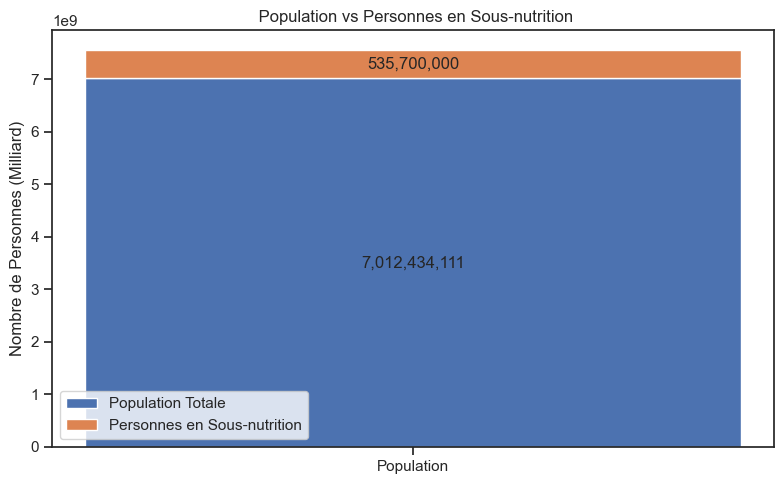

In [326]:
# Calculer les totaux
total_nutrition = population_2017['Population'].sum() - jointure_sous_nutrition['sous_nutrition'].sum()
total_sous_nutrition = jointure_sous_nutrition['sous_nutrition'].sum()

# Créer le graphique empilé
fig, ax = plt.subplots(figsize=(8, 5))

# Barres empilées pour la population totale et les personnes en sous-nutrition
bars = ax.bar(['Population'], [total_nutrition], label='Population Totale')
bars2 = ax.bar(['Population'], [total_sous_nutrition], bottom=[total_nutrition], label='Personnes en Sous-nutrition')

# Ajouter des étiquettes et un titre
ax.set_ylabel('Nombre de Personnes (Milliard)')
ax.set_title(' Population vs Personnes en Sous-nutrition')
ax.legend()

# Ajouter les valeurs sur les barres
ax.bar_label(bars, labels=[f'{total_nutrition:,.0f}'], label_type='center')
ax.bar_label(bars2, labels=[f'{total_sous_nutrition:,.0f}'], label_type='center')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [327]:
#affichage après trie des 10 pires pays
# Trier les résultats par ordre croissant de la proportion de sous-nutrition
jointure_sous_nutrition_sorted = jointure_sous_nutrition.sort_values(by='proportion_sous_nutrition', ascending=False)

# Afficher les dix premiers résultats
print("Proportion de personnes en état de sous-nutrition pour la période 2017-2019 (triée par ordre décroissant) :")
print(jointure_sous_nutrition_sorted[['Zone', 'Population', 'sous_nutrition', 'proportion_sous_nutrition']].head(10))


Proportion de personnes en état de sous-nutrition pour la période 2017-2019 (triée par ordre décroissant) :
                                      Zone  Population  sous_nutrition  \
78                                   Haiti  10982366.0       5300000.0   
157  Democratic People's Republic of Korea  25429825.0      12000000.0   
108                             Madagascar  25570512.0      10500000.0   
103                                Liberia   4702226.0       1800000.0   
100                                Lesotho   2091534.0        800000.0   
183                                   Chad  15016753.0       5700000.0   
161                                 Rwanda  11980961.0       4200000.0   
121                             Mozambique  28649018.0       9400000.0   
186                            Timor-Leste   1243258.0        400000.0   
0                              Afghanistan  36296113.0      10500000.0   

     proportion_sous_nutrition  
78                       48.26  
157        

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [328]:
#calcul du total de l'aide alimentaire par pays
total_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

# Affichage du résultat
print(total_par_pays)


           Zone      Valeur
0   Afghanistan   185452000
1       Algérie    81114000
2        Angola     5014000
3    Bangladesh   348188000
4       Bhoutan     2666000
..          ...         ...
71       Zambie     3026000
72     Zimbabwe    62570000
73       Égypte     1122000
74     Équateur     1362000
75     Éthiopie  1381294000

[76 rows x 2 columns]


In [329]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
# Trie des pays par ordre décroissant de l'aide alimentaire reçue
top_10_pays = total_par_pays.sort_values(by='Valeur', ascending=False).head(10)

# Affichage du résultat
print(top_10_pays)

                                Zone      Valeur
50         République arabe syrienne  1858943000
75                          Éthiopie  1381294000
70                             Yémen  1206484000
61                     Soudan du Sud   695248000
60                            Soudan   669784000
30                             Kenya   552836000
3                         Bangladesh   348188000
59                           Somalie   292678000
53  République démocratique du Congo   288502000
43                             Niger   276344000


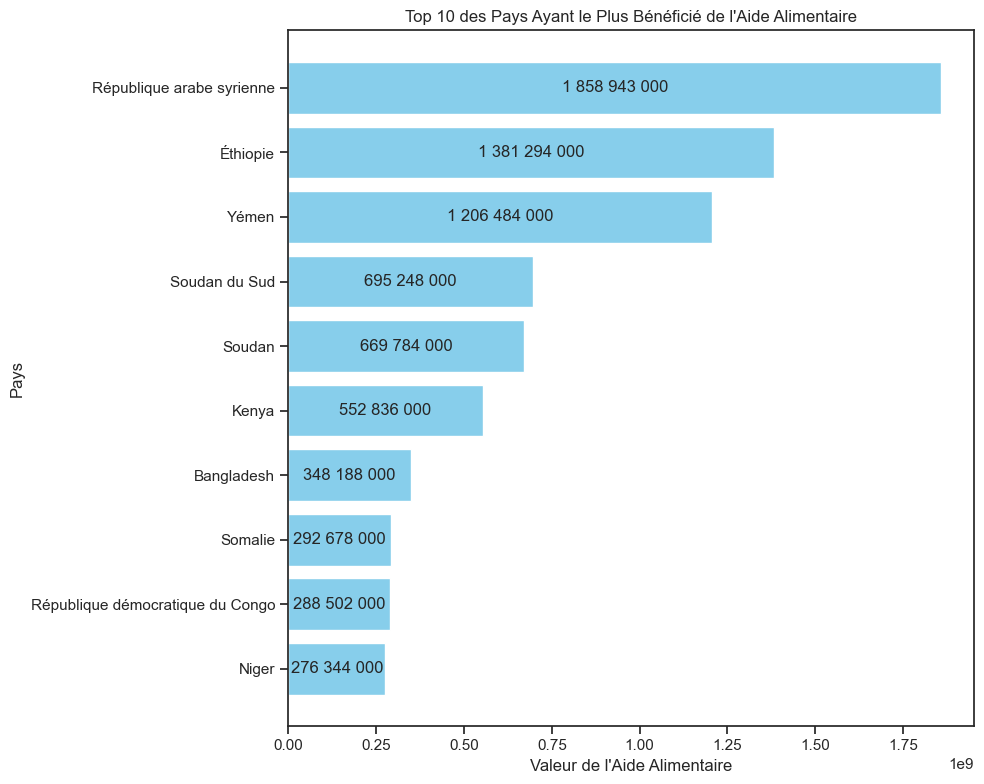

In [330]:
# Inverser l'ordre des lignes pour l'affichage
top_10_pays = top_10_pays.iloc[::-1]

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Barres horizontales
bars = ax.barh(top_10_pays['Zone'], top_10_pays['Valeur'], color='skyblue')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Valeur de l\'Aide Alimentaire')
ax.set_ylabel('Pays')
ax.set_title('Top 10 des Pays Ayant le Plus Bénéficié de l\'Aide Alimentaire')

# Afficher les valeurs à l'intérieur des barres avec un espace comme séparateur de milliers et un point pour les décimales
ax.bar_label(bars, labels=[f'{int(v):,}'.replace(',', ' ') for v in top_10_pays['Valeur']], label_type='center')

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [331]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# Groupby sur 'Zone' et 'Année' et somme des valeurs
groupe_zone_annee = aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

# Affichage du résultat
print(groupe_zone_annee)

            Zone  Année     Valeur
0    Afghanistan   2013  128238000
1    Afghanistan   2014   57214000
2        Algérie   2013   35234000
3        Algérie   2014   18980000
4        Algérie   2015   17424000
..           ...    ...        ...
223       Égypte   2013    1122000
224     Équateur   2013    1362000
225     Éthiopie   2013  591404000
226     Éthiopie   2014  586624000
227     Éthiopie   2015  203266000

[228 rows x 3 columns]


In [332]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
# Calcul du total de l'aide alimentaire par pays
total_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

# Trie des pays par ordre décroissant de l'aide alimentaire reçue
top_5_pays = total_par_pays.sort_values(by='Valeur', ascending=False).head(5)

# Création de la liste des 5 pays qui ont le plus bénéficié de l'aide alimentaire
liste_top_5_pays = top_5_pays['Zone'].tolist()

# Affichage de la liste
print(liste_top_5_pays)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [333]:
#On filtre sur le dataframe avec notre liste
# Filtrer groupe_zone_annee avec la liste des top 5 pays
filtre_groupe_zone_annee = groupe_zone_annee[groupe_zone_annee['Zone'].isin(liste_top_5_pays)]

In [334]:
# Affichage des pays avec l'aide alimentaire par année
# Afficher le résultat
print(filtre_groupe_zone_annee)

                          Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000


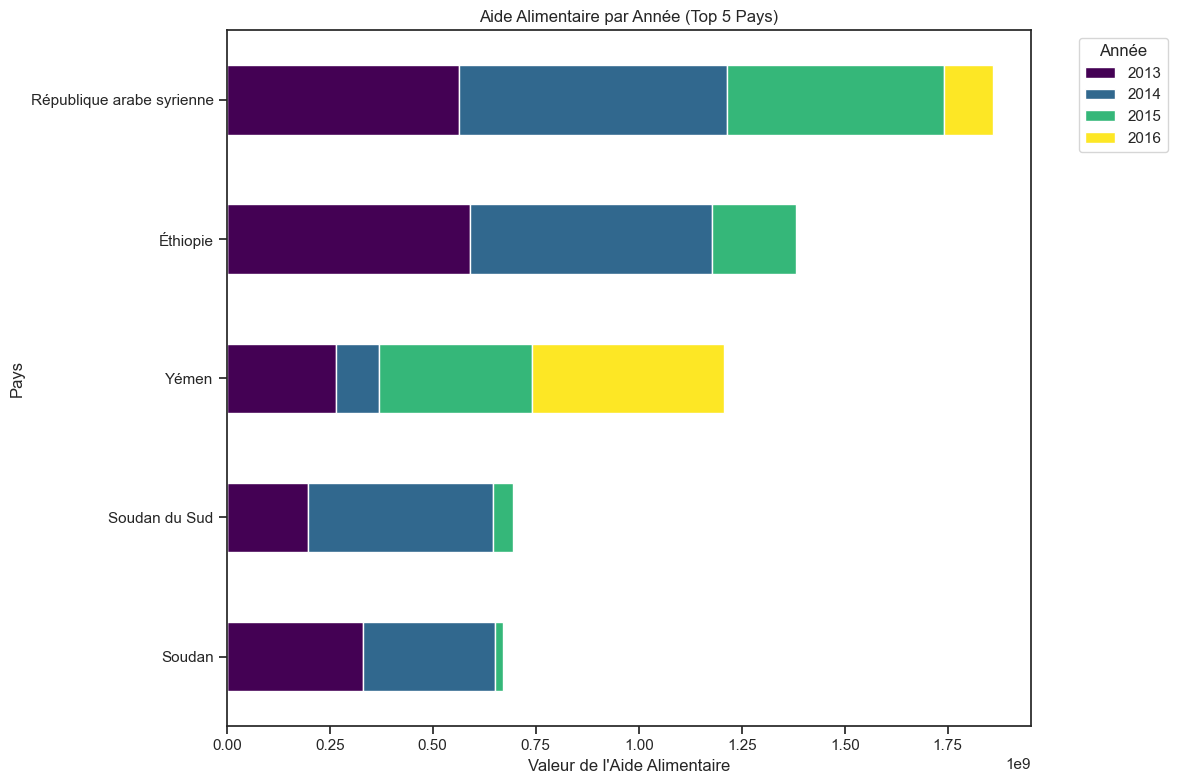

In [335]:
# Pivoter le DataFrame pour faciliter la création du graphique empilé
pivot_df = filtre_groupe_zone_annee.pivot(index='Zone', columns='Année', values='Valeur')

# Calculer la somme totale pour chaque pays et trier
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total')

# Supprimer la colonne 'Total' après le tri
pivot_df = pivot_df.drop(columns='Total')

# Créer le graphique empilé
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
pivot_df.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Valeur de l\'Aide Alimentaire')
ax.set_ylabel('Pays')
ax.set_title('Aide Alimentaire par Année (Top 5 Pays)')
ax.legend(title='Année', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [336]:
#Calcul de la disponibilité en kcal par personne par jour par pays
# Calcul de la somme des valeurs de 'Disponibilité alimentaire (Kcal/personne/jour)' par pays
somme_par_pays_moins = jointure_dispo_alim.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values()
somme_par_pays_plus = jointure_dispo_alim.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False)

#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
# Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
print(somme_par_pays_moins)
print(somme_par_pays_plus)


Zone
République centrafricaine    1879.0
Zambie                       1924.0
Madagascar                   2056.0
Afghanistan                  2087.0
Haïti                        2089.0
                              ...  
Israël                       3610.0
États-Unis d'Amérique        3682.0
Turquie                      3708.0
Belgique                     3737.0
Autriche                     3770.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 172, dtype: float64
Zone
Autriche                     3770.0
Belgique                     3737.0
Turquie                      3708.0
États-Unis d'Amérique        3682.0
Israël                       3610.0
                              ...  
Haïti                        2089.0
Afghanistan                  2087.0
Madagascar                   2056.0
Zambie                       1924.0
République centrafricaine    1879.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 172, dtype: float64


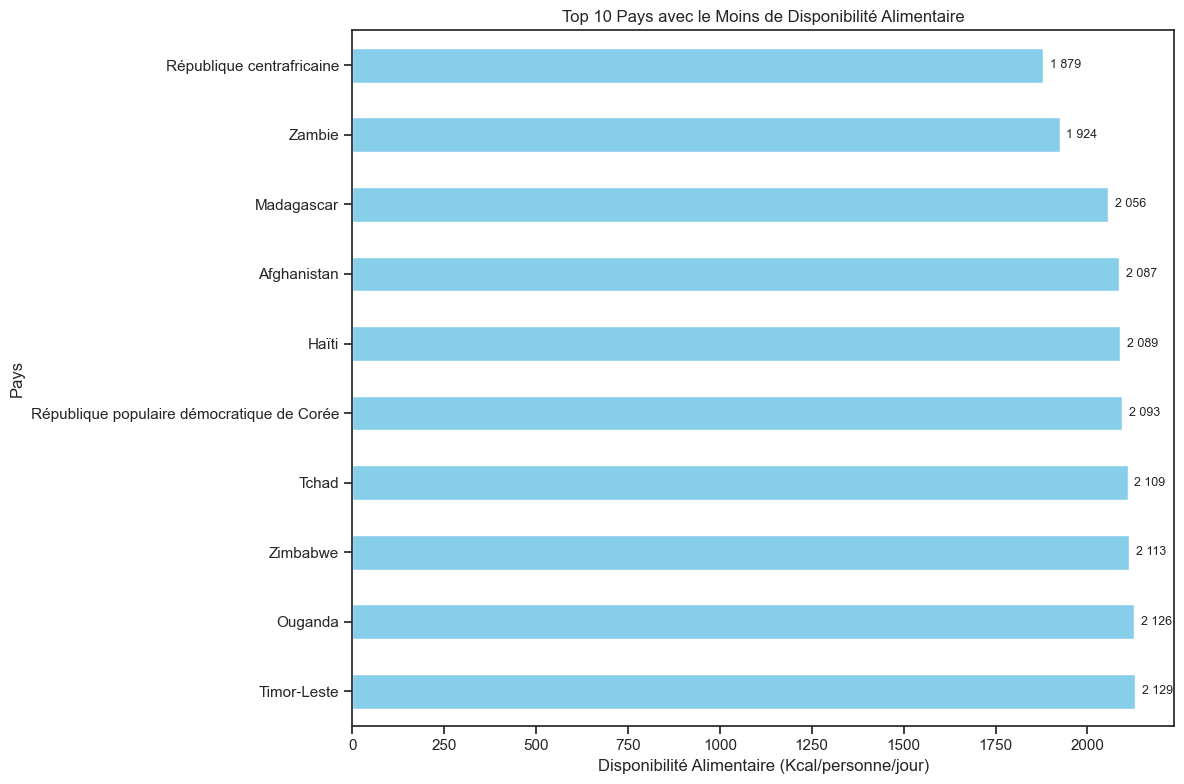

In [337]:
# Sélectionner les 10 pays avec le moins de disponibilité alimentaire
top_10_moins_dispo = somme_par_pays_moins.head(10).sort_values()

# Créer le graphique en histogramme horizontal
fig, ax = plt.subplots(figsize=(12, 8))
bars = top_10_moins_dispo.plot(kind='barh', ax=ax, color='skyblue')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Disponibilité Alimentaire (Kcal/personne/jour)')
ax.set_ylabel('Pays')
ax.set_title('Top 10 Pays avec le Moins de Disponibilité Alimentaire')
ax.invert_yaxis()  # Inverser l'axe y pour afficher le pays avec le moins de disponibilité en haut

# Afficher les valeurs sur les barres avec un espace comme séparateur de milliers
for bar in bars.patches:
    value = bar.get_width()
    ax.annotate(f'{value:,.0f}'.replace(',', ' '),  # Formatage avec espace pour les milliers
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Décalage du texte
                textcoords="offset points",
                ha='left', va='center', fontsize=9)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

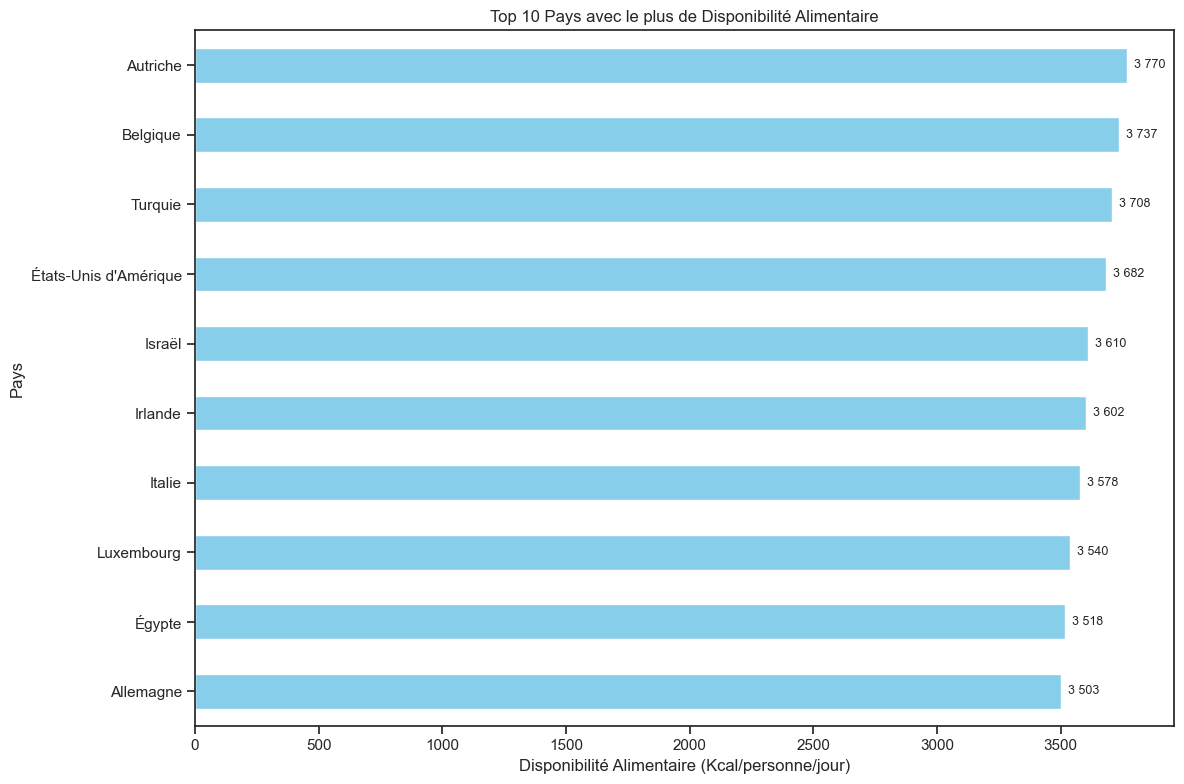

In [338]:
# Sélectionner les 10 pays avec le plus de disponibilité alimentaire
top_10_plus_dispo = somme_par_pays_plus.head(10).sort_values(ascending=False)

# Créer le graphique en histogramme horizontal
fig, ax = plt.subplots(figsize=(12, 8))
bars = top_10_plus_dispo.plot(kind='barh', ax=ax, color='skyblue')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Disponibilité Alimentaire (Kcal/personne/jour)')
ax.set_ylabel('Pays')
ax.set_title('Top 10 Pays avec le plus de Disponibilité Alimentaire')
ax.invert_yaxis()  # Inverser l'axe y pour afficher le pays avec le moins de disponibilité en haut

# Afficher les valeurs sur les barres avec un espace comme séparateur de milliers
for bar in bars.patches:
    value = bar.get_width()
    ax.annotate(f'{value:,.0f}'.replace(',', ' '),  # Formatage avec espace pour les milliers
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Décalage du texte
                textcoords="offset points",
                ha='left', va='center', fontsize=9)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [339]:
#création d'un dataframe avec uniquement la Thaïlande 
# Filtrer les données pour ne garder que celles de la Thaïlande
thailande_data = jointure_sous_nutrition[jointure_sous_nutrition['Zone'] == 'Thailand']
thailande_data

,Zone,Année_x,Population,Année_y,sous_nutrition,proportion_sous_nutrition
185,Thailand,2017,69209810.0,2016-2018,6200000.0,8.96


In [340]:
#Calcul de la sous nutrition en Thaïlande
print(f"Population : {thailande_data["Population"].values[0]:,.0f} personnes")
print(f"Sous-nutrition : {thailande_data["sous_nutrition"].values[0]:,.0f} personnes")
print(f"Proportion sous-nourrie : {thailande_data["proportion_sous_nutrition"].values[0]:.2f}%")

Population : 69,209,810 personnes
Sous-nutrition : 6,200,000 personnes
Proportion sous-nourrie : 8.96%


In [341]:
# Filtrer les données pour ne conserver que les lignes où la colonne 'Zone' est 'Thaïlande' et 'Produit' est 'Manioc'
#thailande_manioc_df = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc')]
thailande_manioc_df = jointure_dispo_alim.loc[(jointure_dispo_alim['Zone'] == 'Thaïlande') & (jointure_dispo_alim['Produit'] == 'Manioc')]

# Extraire les colonnes souhaitées sous forme de listes
disponibilite_interieure = [f"{value:,}".replace(",", " ") for value in thailande_manioc_df['Disponibilité intérieure']]
disponibilite_alimentaire = [f"{value:,}".replace(",", " ") for value in thailande_manioc_df['Disponibilité alimentaire en quantité (kg/personne/an)']]
exportation = [f"{value:,}".replace(",", " ") for value in thailande_manioc_df['Exportations - Quantité']]
importation = [f"{value:,}".replace(",", " ") for value in thailande_manioc_df['Importations - Quantité']]
production = [f"{value:,}".replace(",", " ") for value in thailande_manioc_df['Production']]


# Afficher les résultats
print("Disponibilité intérieure:", disponibilite_interieure)
print("Disponibilité Disponibilité alimentaire en quantité (kg/personne/an):", disponibilite_alimentaire)
print("Exportation:", exportation)
print("Importation:", importation)
print("Production:", production)


# Afficher le résultat
thailande_manioc_df

Disponibilité intérieure: ['6 264 000 000.0']
Disponibilité Disponibilité alimentaire en quantité (kg/personne/an): ['13.0']
Exportation: ['25 214 000 000.0']
Importation: ['1 250 000 000.0']
Production: ['30 228 000 000.0']


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
14166,Thaïlande,2017,69209810.0,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,...,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2.768392e+09


In [342]:
print('Proportion de manioc exportée :', "{:.2f}".format(thailande_manioc_df['Exportations - Quantité'].iloc[0]*100 / thailande_manioc_df['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


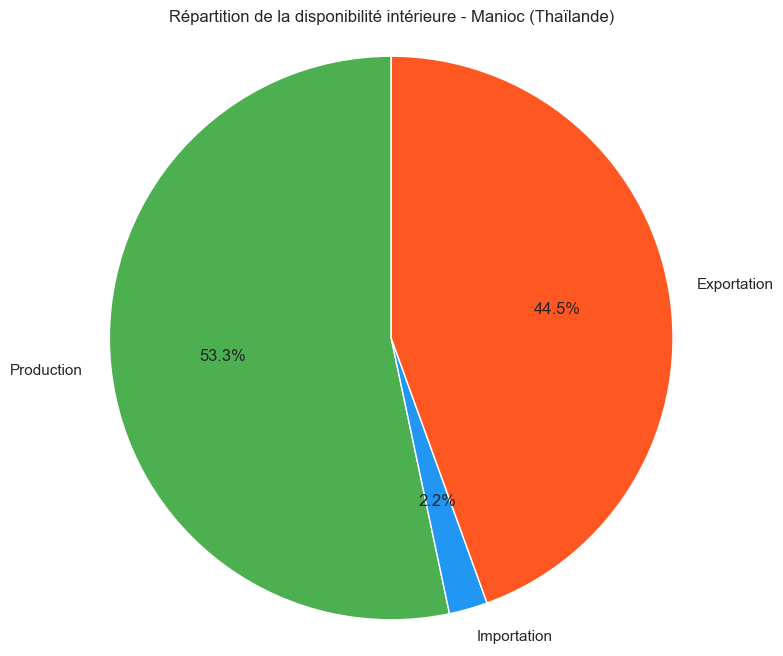

In [343]:
# On prend les totaux pour la Thaïlande et le Manioc
total_importation = thailande_manioc_df['Importations - Quantité'].sum()
total_exportation = thailande_manioc_df['Exportations - Quantité'].sum()
total_production = thailande_manioc_df['Production'].sum()

# Préparation des valeurs pour le camembert
values = [total_production, total_importation, total_exportation]
labels = ['Production', 'Importation', 'Exportation']
colors = ['#4CAF50', '#2196F3', '#FF5722']

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Répartition de la disponibilité intérieure - Manioc (Thaïlande)")
plt.axis('equal')  # Pour un cercle parfait
plt.show()


In [344]:
#Quelle est la disponibilité par habitant pour la Thaïlande ? 
thai_jointure_dispo_alim = pd.merge(population_2017, thailande_manioc_df, on='Zone')
#print(thai_jointure_dispo_alim['Disponibilité intérieure'] / thai_jointure_dispo_alim['Population'])
#print("Disponibilité alimentaire en quantité (kg/personne/an):", disponibilite_alimentaire)


nourriture =  thailande_manioc_df['Nourriture'].sum()
aliments_animaux = thailande_manioc_df['Aliments pour animaux'].sum()
pertes = thailande_manioc_df['Pertes'].sum()
semences = thailande_manioc_df['Semences'].sum()
traitement = thailande_manioc_df['Traitement'].sum()
autres_utilisation = thailande_manioc_df['Autres Utilisations'].sum()

print("Disponibilité intérieure:", disponibilite_interieure)
print("Nourriture:", nourriture)
print("Aliments pour animaux:", aliments_animaux)
print("pertes:", pertes)
print("Semences:", semences)
print("Traitement:", traitement)
print("Autres utilisations:", autres_utilisation)

Disponibilité intérieure: ['6 264 000 000.0']
Nourriture: 871000000.0
Aliments pour animaux: 1800000000.0
pertes: 1511000000.0
Semences: 0.0
Traitement: 0.0
Autres utilisations: 2081000000.0


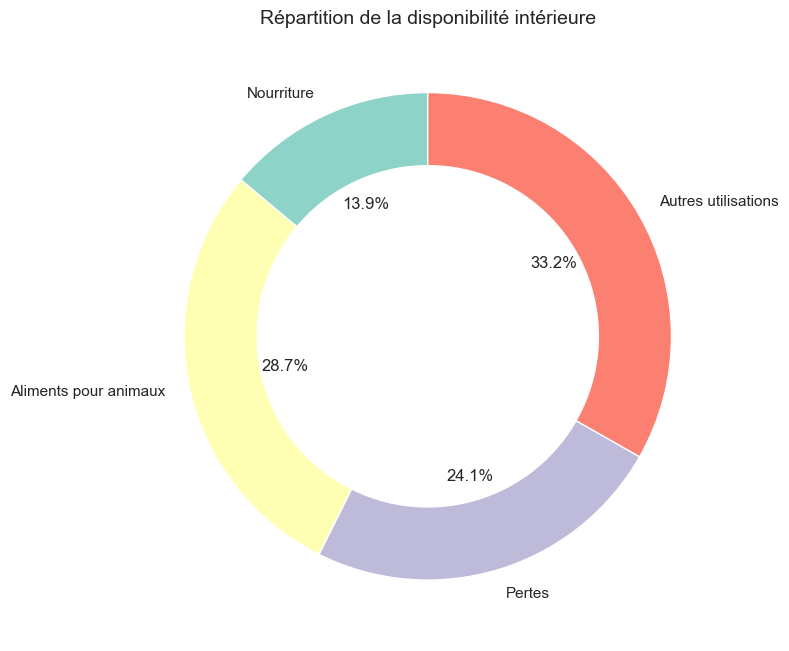

In [345]:
labels = ['Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres utilisations']
valeurs = [nourriture, aliments_animaux, pertes, autres_utilisation]

# Création du camembert
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    valeurs,
    labels=labels,
    autopct='%1.1f%%',   # Affiche les pourcentages
    startangle=90,       # Pour commencer par le haut
    colors=plt.cm.Set3.colors  # Jolie palette de couleurs
)

# Ajouter un cercle pour faire un "donut" (optionnel, pour plus de style)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Titre
ax.set_title("Répartition de la disponibilité intérieure", fontsize=14)

# Afficher
plt.tight_layout()
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [352]:
print("personnes en etat de sous-nutrition:", thailande_data['sous_nutrition'].sum())
print("dispo_kcal pour le manioc:", thailande_manioc_df['dispo_kcal'].sum())
#calcul du nombre de personnes pouvant être nourries avec le manioc
personne_alim = thailande_manioc_df['dispo_kcal'].sum() / consommation_moyenne
print("le manioc peut nourrir (dispo_kcal / consommation_moyenne) :", personne_alim)

#calcul de la quantité total disponible pour le manioc
print("Disponibilité alimentaire en quantité (kg/personne/an):", thailande_manioc_df['Disponibilité alimentaire en quantité (kg/personne/an)'].sum())
dispo_qtt = thailande_manioc_df['Disponibilité alimentaire en quantité (kg/personne/an)'].sum() * thailande_data["Population"].sum()
print("quantité total de manioc :", dispo_qtt)

#quantité necessaire pour nourrir toutes les personnes en état de sous nutrition :
qtt_manioc_equilibre = (thailande_data['sous_nutrition'].sum() * dispo_qtt) / personne_alim
print("quantité total nécessaire pour alimenter la population :", qtt_manioc_equilibre)

#Calcul de la proportion de l'exportation necessaire pour alimenter les personnes en état de sous nutrition
proportion_export = round((qtt_manioc_equilibre * 100) / total_exportation)
print("pourcentage necessaire à nourrir les personnes en etat de sous nutrition :", proportion_export, "%")


personnes en etat de sous-nutrition: 6200000.0
dispo_kcal pour le manioc: 2768392400.0
le manioc peut nourrir (dispo_kcal / consommation_moyenne) : 1230396.6222222222
Disponibilité alimentaire en quantité (kg/personne/an): 13.0
quantité total de manioc : 899727530.0
quantité total nécessaire pour alimenter la population : 4533750000.0
pourcentage necessaire à nourrir les personnes en etat de sous nutrition : 18 %
